# TASK 1

In [34]:
import numpy as np
import pandas as pd 
import re
import spacy
nlp=spacy.load('en_core_web_sm')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=(12,7)

## DataLoad

In [35]:
df=pd.concat([pd.read_csv('Review1.txt',sep='delimiter',header=None,engine='python'),pd.read_csv('Review2.txt',sep='delimiter',header=None,engine='python'),pd.read_csv('Review3.txt',sep='delimiter',header=None,engine='python')],axis=1)
df.columns=['Review1','Review2','Review3']
df

,Review1,Review2,Review3
0,__label__1 The Backup Plan: Summer reading tha...,"__label__1 Goes ""Haywire"" Regularly: Setup was...",__label__1 Missing over 80 pages...!: I have f...
1,__label__1 would not work with verizon card: I...,"__label__2 Old fashioned, sweet story.: Not mu...",__label__1 Movie Guide: The book is comprehens...
2,"__label__2 A Profound Journey!: Lumari's book,...",__label__1 Stay Away: This just plain bad. Bor...,__label__2 Great Collection: Johnson Records s...
3,__label__1 No relief!: The product information...,__label__1 worst.........movie............ever...,"__label__2 Good album, continuing the hits.: T..."
4,__label__1 good for fur bad for keping fleas o...,__label__1 Blu-Ray Review: What a terrible mov...,__label__2 great gaming and working accesorie:...
...,...,...,...
981,__label__2 Fascinating: I would have to recomm...,NaN,NaN
982,__label__2 great deal: This is my second proje...,NaN,NaN
983,__label__1 Does not perform as stated and impl...,NaN,NaN
984,__label__1 Seems that they have 2 mango variet...,NaN,NaN


In [36]:
df['Review1']=df['Review1'].str.lower()
df['Review2']=df['Review2'].str.lower()
df['Review3']=df['Review3'].str.lower()

In [37]:
R1=open('Review1.txt','r').read().lower()
R2=open('Review2.txt','r').read().lower()
R3=open('Review3.txt','r').read().lower()

In [38]:
len(re.findall(r'\n',R3))

964

## Clean

In [39]:
def clean(text):
     text=re.sub(r'https?://\S+|www\.\S+','_URl_',text)
     text=re.sub(r'[\W_]', ' ', text)
     text=re.sub(r'\s+\b\d+\b', '', text)
     text=re.sub(r'\s\-\s', '', text)
     text=re.sub(r'\w+\d+\w+',' ',text)
     text=re.sub(r'\blabel\b',' ',text)
     text=re.sub(r'\s+',' ',text)
     return text
df['Review1']=df['Review1'].apply(clean)
df['Review2']=df.loc[:909,'Review2'].apply(clean)
df['Review3']=df.loc[:963,'Review3'].apply(clean)


In [40]:
df['Review1']

0       the backup plan summer reading that does not ...
1       would not work with verizon card i tried to g...
2       a profound journey lumari s book akashic reco...
3       no relief the product information says that i...
4       good for fur bad for keping fleas off the pro...
                             ...                        
981     fascinating i would have to recommend this mo...
982     great deal this is my second projector and fi...
983     does not perform as stated and implied and wi...
984     seems that they have mango varieties a few mo...
985     awful blanched tasteless and hard i can t bel...
Name: Review1, Length: 986, dtype: object

In [41]:
import re
from collections import Counter
m={}
ls=[]
count=Counter(re.findall(r'\w+',df['Review1'][0]))
count
for word in df['Review1'][0].split():
        if word not in m: 
            m[word]=len(m)
for i,j in zip(m.values(),count.values()):
      ls.append((i,j))

In [42]:

df['Review1'].apply(lambda x: Counter(re.findall(r'\w+',x)))
df['Review1']=df['Review1'].apply(remove_stopwords)

In [43]:
pos=open("positive-words.txt").read()

In [44]:
" ".join([word for word in df['Review1'][1].split() if word in  pos])

'work work success ended g works priced'

In [45]:
df['Review1'][1]

'work verizon card tried work verizon card success updating software ended buying linksyswireless g router mobile broadband vn works priced linksys require software update linksys website'

In [46]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [47]:
sent_r1=pd.concat([df['Review1'] , pd.DataFrame(df['Review1'].apply(analyzer.polarity_scores).tolist())] , axis = 1)

In [48]:
pd.DataFrame([sent_r1[['neg']].sum().values,sent_r1[['neu']].sum().values,sent_r1[['pos']].sum().values])

,0
0,103.573
1,593.216
2,289.232


In [49]:
sent_r2=pd.concat([df.loc[:909,'Review2'] , pd.DataFrame(df.loc[:909,'Review2'].apply(analyzer.polarity_scores).tolist())] , axis = 1)

In [50]:
sent_r3=pd.concat([df.loc[:963,'Review3'] , pd.DataFrame(df.loc[:963,'Review3'].apply(analyzer.polarity_scores).tolist())] , axis = 1)

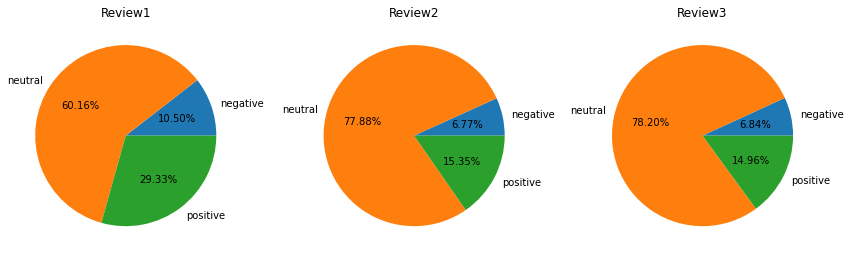

In [51]:
fig,ax=plt.subplots(1,3,figsize=(12,7))
ax[0].set_title('Review1')
ax[1].set_title('Review2')
ax[2].set_title('Review3')
ax[0].pie(pd.DataFrame([sent_r1[['neg']].sum().values,sent_r1[['neu']].sum().values,sent_r1[['pos']].sum().values])[0],labels=['negative','neutral','positive'],autopct='%.2f%%');
ax[1].pie(pd.DataFrame([sent_r2[['neg']].sum().values,sent_r2[['neu']].sum().values,sent_r2[['pos']].sum().values])[0],labels=['negative','neutral','positive'],autopct='%.2f%%');
ax[2].pie(pd.DataFrame([sent_r3[['neg']].sum().values,sent_r3[['neu']].sum().values,sent_r3[['pos']].sum().values])[0],labels=['negative','neutral','positive'],autopct='%.2f%%');
plt.tight_layout()

In [52]:
import transformers
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["It was the best of times.", "t was the worst of times."]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.999457061290741},
 {'label': 'NEGATIVE', 'score': 0.9987302422523499}]

In [53]:
status=[]
for i in range(len(df['Review1'])):
  status.append(sentiment_pipeline(df['Review1'][i])[0]['label'])


In [54]:
status1=[]
for i in range(len(df.loc[:909,'Review2'])):
  status1.append(sentiment_pipeline(df.loc[:909,'Review2'][i])[0]['label'])

In [55]:
status2=[]
for i in range(len(df.loc[:963,'Review3'])):
  status2.append(sentiment_pipeline(df.loc[:963,'Review3'][i])[0]['label'])

In [56]:
sent_r1=pd.concat([sent_r1,pd.DataFrame({'Status':status})],axis=1)
sent_r2=pd.concat([sent_r2,pd.DataFrame({'Status':status1})],axis=1)
sent_r3=pd.concat([sent_r3,pd.DataFrame({'Status':status2})],axis=1)

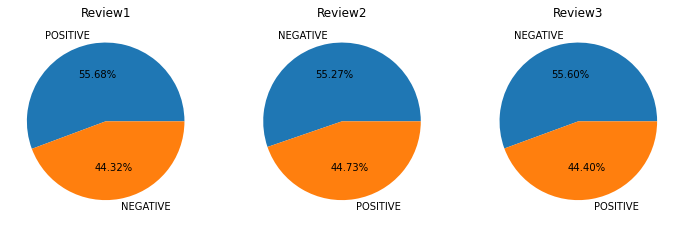

In [57]:
fig,ax=plt.subplots(1,3,figsize=(12,7))
ax[0].set_title('Review1')
ax[1].set_title('Review2')
ax[2].set_title('Review3')
ax[0].pie(sent_r1['Status'].value_counts(),labels=sent_r1['Status'].unique(),autopct='%.2f%%');
ax[1].pie(sent_r2['Status'].value_counts(),labels=sent_r2['Status'].unique(),autopct='%.2f%%');
ax[2].pie(sent_r3['Status'].value_counts(),labels=sent_r3['Status'].unique(),autopct='%.2f%%');


In [59]:
from textblob import TextBlob

In [61]:
def sent_score(text):
  if TextBlob(text).sentiment.polarity >0:
    return 'Positive'
  elif TextBlob(text).sentiment.polarity <0:
    return 'Negative'
  else:
    return 'Neutral'


In [62]:
sent_r1['textblob_status']=sent_r1['Review1'].apply(sent_score)

In [63]:
sent_r2['textblob_status']=sent_r2['Review2'].apply(sent_score)
sent_r3['textblob_status']=sent_r3['Review3'].apply(sent_score)

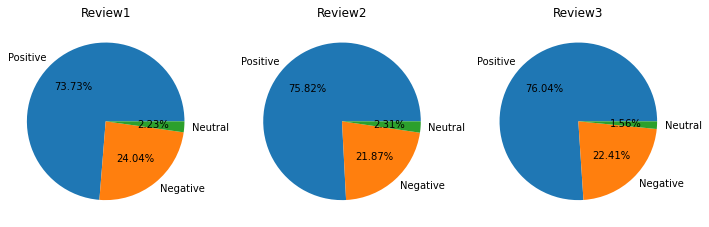

In [74]:
fig,ax=plt.subplots(1,3,figsize=(12,7))
ax[0].set_title('Review1')
ax[1].set_title('Review2')
ax[2].set_title('Review3')
ax[0].pie(sent_r1['textblob_status'].value_counts(),labels=sent_r1['textblob_status'].unique(),autopct='%.2f%%');
ax[1].pie(sent_r2['textblob_status'].value_counts(),labels=sent_r2['textblob_status'].unique(),autopct='%.2f%%');
ax[2].pie(sent_r3['textblob_status'].value_counts(),labels=sent_r3['textblob_status'].unique(),autopct='%.2f%%');

In [64]:
sent_r1.head(5)

,Review1,neg,neu,pos,compound,Status,textblob_status
0,backup plan summer reading require reader foun...,0.075,0.578,0.347,0.8834,POSITIVE,Positive
1,work verizon card tried work verizon card succ...,0.000,0.871,0.129,0.5719,NEGATIVE,Positive
2,profound journey lumari s book akashic records...,0.000,0.680,0.320,0.9781,POSITIVE,Positive
3,relief product information says takes days pro...,0.094,0.681,0.225,0.8242,NEGATIVE,Negative
4,good fur bad keping fleas product pets fur sof...,0.213,0.610,0.177,-0.1531,NEGATIVE,Negative


In [65]:
if sent_r1.loc[0,'neg'] == sent_r1.loc[0,['neg','neu','pos']].max():
    print('Negative')
elif sent_r1.loc[0,'neu'] == sent_r1.loc[0,['neg','neu','pos']].max():
    print('Neutral')
else:
    print('Positive')

Neutral


In [66]:
def max_score(data):
  ls=[]
  for i in range(len(data)):
    if data.loc[i,'neg'] == data.loc[i,['neg','neu','pos']].max():
      ls.append('Negative')
    elif data.loc[i,'neu'] == data.loc[i,['neg','neu','pos']].max():
      ls.append('Neutral')
    else:
      ls.append('Positive')
  return ls
sent_r1['vender_status']=pd.DataFrame(max_score(sent_r1))


In [67]:
sent_r2['vender_status']=pd.DataFrame(max_score(sent_r2))
sent_r3['vender_status']=pd.DataFrame(max_score(sent_r3))

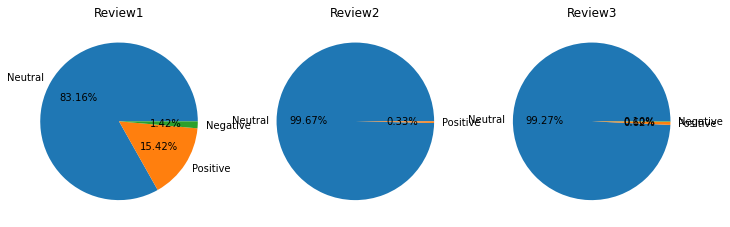

In [75]:
fig,ax=plt.subplots(1,3,figsize=(12,7))
ax[0].set_title('Review1')
ax[1].set_title('Review2')
ax[2].set_title('Review3')
ax[0].pie(sent_r1['vender_status'].value_counts(),labels=sent_r1['vender_status'].unique(),autopct='%.2f%%');
ax[1].pie(sent_r2['vender_status'].value_counts(),labels=sent_r2['vender_status'].unique(),autopct='%.2f%%');
ax[2].pie(sent_r3['vender_status'].value_counts(),labels=sent_r3['vender_status'].unique(),autopct='%.2f%%');


In [68]:
sent_r1.head()

,Review1,neg,neu,pos,compound,Status,textblob_status,vender_status
0,backup plan summer reading require reader foun...,0.075,0.578,0.347,0.8834,POSITIVE,Positive,Neutral
1,work verizon card tried work verizon card succ...,0.000,0.871,0.129,0.5719,NEGATIVE,Positive,Neutral
2,profound journey lumari s book akashic records...,0.000,0.680,0.320,0.9781,POSITIVE,Positive,Neutral
3,relief product information says takes days pro...,0.094,0.681,0.225,0.8242,NEGATIVE,Negative,Neutral
4,good fur bad keping fleas product pets fur sof...,0.213,0.610,0.177,-0.1531,NEGATIVE,Negative,Neutral


# TASK 2

## StopWords

In [69]:
stopwords=nlp.Defaults.stop_words
stop_dict=stopwords
rm=['ingredients','live', 'person', 'went','came', 'gave', 'seen ','movie']
for i in rm:
    stop_dict.add(i)
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_dict])

In [70]:
df['Review1']=df['Review1'].apply(remove_stopwords)
df['Review2']=df.loc[:909,'Review2'].apply(remove_stopwords)
df['Review3']=df.loc[:963,'Review3'].apply(remove_stopwords)

## Lemmatization

In [71]:

def lem(text):
    R1_doc=nlp(text)
    return " ".join(token.lemma_ for token in R1_doc)

In [72]:
df['Review1']=df['Review1'].apply(lem)
df['Review2']=df.loc[:909,'Review2'].apply(lem)
df['Review3']=df.loc[:963,'Review3'].apply(lem)

In [73]:
df

,Review1,Review2,Review3
0,backup plan summer reading require reader find...,go haywire regularly setup easy printer routin...,miss page find entire n section good deal m se...
1,work verizon card try work verizon card succes...,old fashioned sweet story challenge read enjoy...,guide book comprehensive seldom try look pictu...
2,profound journey lumari s book akashic record ...,stay away plain bad boring find bit entertain ...,great collection johnson record star dub shell...
3,relief product information say take day produc...,bad break open red light camera steal film wat...,good album continue hit good album switchfoot ...
4,good fur bad kepe flea product pet fur soft fa...,blu ray review terrible garbage totally suck h...,great gaming work accesorie new wrong movement...
...,...,...,...
981,fascinating recommend people enjoy atypical th...,NaN,NaN
982,great deal second projector viewsonic small co...,NaN,NaN
983,perform state implied smoke leave smokeless it...,NaN,NaN
984,mango variety month ago friend turn bag marian...,NaN,NaN
